<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [1]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
import warnings
import itertools
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import scikitplot as skplt
import sqlite3 as sql

import pandas_ta as ta
import talib

import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from futures_backtester import Backtester

# Função de Entrada

In [3]:
import importlib
name_strategy = 'pattern_rsi_anti_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [4]:

path_b3 = 'C:/Users/User/OneDrive/Documentos/rnt/Finance/Trading Projects/00.database/candlestick data/futuros/'
path_tickmill = 'C:/Users/User/OneDrive/Documentos/rnt/Finance/Trading Projects/00.database/tickmill/forex/'

dict_custos = {'WIN@N':0.2*5, 'WDO@N':2.40/2,
                                     'AUDUSD': 3,
                                     'EURUSD': 3,
                                     'GBPUSD': 3,
                                     'NZDUSD': 3,
                                     'USDCHF': 3,
                                     'USDJPY': 3,
                                     'AUDCAD': 3,
                                     'AUDCHF': 3,
                                     'AUDJPY': 3,
                                     'AUDNZD': 3,
                                     'CADCHF': 3,
                                     'CADJPY': 3,
                                     'CHFJPY': 3,
                                     'EURAUD': 3,
                                     'EURCAD': 3,
                                     'EURCHF': 3,
                                     'EURGBP': 3,
                                     'EURHKD': 3,
                                     'EURJPY': 3,
                                     'EURMXN': 3,
                                     'EURNZD': 3,
                                     'EURTRY': 3,
                                     'GBPCAD': 3,
                                     'GBPCHF': 3,
                                     'GBPJPY': 3,
                                     'USDCNH': 3,
                                     'USDCZK': 3,
                                     'USDMXN': 3,
                                     'USDTRY': 3,
                                     'XAGUSD': 3,
                                     'XAUUSD': 3,
                                     'STOXX50': 3,
                                     'UK100': 3,
                                     'FRANCE40': 3,
                                     'VIX': 3,
                                     'ALUMINIUM': 3,
                                     'PLATINUM': 3,
                                     'LEAD': 3,
                                     'NICKEL': 3,
                                     'PALLADIUM': 3,
                                     'ZINC': 3,
                                     'COPPER': 3,
                                     'DXY': 3,
                                     'COCOA': 3,
                                     'SUGAR': 3,
                                     'WHEAT': 3,
                                     'US500': 3,
                                     'NAT.GAS': 3,
                                     'BRENT': 3,
                                     'EEM': 3,
                                     'EWZ': 3,
                                     'IWM': 3,
                                     'TLT': 3,
                                     'SPY': 3,
                                     'DIA': 3}

dict_valor_lot = {'WIN@N':0.2, 'WDO@N':10.0,
                                'USDCAD': 100000,
                                 'AUDUSD': 100000,
                                 'EURUSD': 100000,
                                 'GBPUSD': 100000,
                                 'NZDUSD': 100000,
                                 'USDCHF': 100000,
                                 'USDJPY': 100000,
                                 'AUDCAD': 100000,
                                 'AUDCHF': 100000,
                                 'AUDJPY': 100000,
                                 'AUDNZD': 100000,
                                 'CADCHF': 100000,
                                 'CADJPY': 100000,
                                 'CHFJPY': 100000,
                                 'EURAUD': 100000,
                                 'EURCAD': 100000,
                                 'EURCHF': 100000,
                                 'EURGBP': 100000,
                                 'EURHKD': 100000,
                                 'EURJPY': 100000,
                                 'EURMXN': 100000,
                                 'EURNZD': 100000,
                                 'EURTRY': 100000,
                                 'GBPCAD': 100000,
                                 'GBPCHF': 100000,
                                 'GBPJPY': 100000,
                                 'USDCNH': 100000,
                                 'USDCZK': 100000,
                                 'USDMXN': 100000,
                                 'USDTRY': 100000,
                                 'XAGUSD': 100000,
                                 'XAUUSD': 100000,
                                 'STOXX50': 100000,
                                 'UK100': 100000,
                                 'FRANCE40': 100000,
                                 'VIX': 100000,
                                 'ALUMINIUM': 100000,
                                 'PLATINUM': 100000,
                                 'LEAD': 100000,
                                 'NICKEL': 100000,
                                 'PALLADIUM': 100000,
                                 'ZINC': 100000,
                                 'COPPER': 100000,
                                 'DXY': 100000,
                                 'COCOA': 100000,
                                 'SUGAR': 100000,
                                 'WHEAT': 100000,
                                 'US500': 100000,
                                 'NAT.GAS': 100000,
                                 'BRENT': 100000,
                                 'EEM': 100000,
                                 'EWZ': 100000,
                                 'IWM': 100000,
                                 'TLT': 100000,
                                 'SPY': 100000,
                                 'DIA': 100000}

dict_path = {'WIN@N':path_b3, 'WDO@N':path_b3, 
                              'USDCAD': path_tickmill,
                             'AUDUSD': path_tickmill,
                             'EURUSD': path_tickmill,
                             'GBPUSD': path_tickmill,
                             'NZDUSD': path_tickmill,
                             'USDCHF': path_tickmill,
                             'USDJPY': path_tickmill,
                             'AUDCAD': path_tickmill,
                             'AUDCHF': path_tickmill,
                             'AUDJPY': path_tickmill,
                             'AUDNZD': path_tickmill,
                             'CADCHF': path_tickmill,
                             'CADJPY': path_tickmill,
                             'CHFJPY': path_tickmill,
                             'EURAUD': path_tickmill,
                             'EURCAD': path_tickmill,
                             'EURCHF': path_tickmill,
                             'EURGBP': path_tickmill,
                             'EURHKD': path_tickmill,
                             'EURJPY': path_tickmill,
                             'EURMXN': path_tickmill,
                             'EURNZD': path_tickmill,
                             'EURTRY': path_tickmill,
                             'GBPCAD': path_tickmill,
                             'GBPCHF': path_tickmill,
                             'GBPJPY': path_tickmill,
                             'USDCNH': path_tickmill,
                             'USDCZK': path_tickmill,
                             'USDMXN': path_tickmill,
                             'USDTRY': path_tickmill,
                             'XAGUSD': path_tickmill,
                             'XAUUSD': path_tickmill,
                             'STOXX50': path_tickmill,
                             'UK100': path_tickmill,
                             'FRANCE40': path_tickmill,
                             'VIX': path_tickmill,
                             'ALUMINIUM': path_tickmill,
                             'PLATINUM': path_tickmill,
                             'LEAD': path_tickmill,
                             'NICKEL': path_tickmill,
                             'PALLADIUM': path_tickmill,
                             'ZINC': path_tickmill,
                             'COPPER': path_tickmill,
                             'DXY': path_tickmill,
                             'COCOA': path_tickmill,
                             'SUGAR': path_tickmill,
                             'WHEAT': path_tickmill,
                             'US500': path_tickmill,
                             'NAT.GAS': path_tickmill,
                             'BRENT': path_tickmill,
                             'EEM': path_tickmill,
                             'EWZ': path_tickmill,
                             'IWM': path_tickmill,
                             'TLT': path_tickmill,
                             'SPY': path_tickmill,
                             'DIA': path_tickmill}

# Cenários

In [5]:
# win 5 min


# wdo 5 min


# USDJPY 5 min
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}

In [6]:
params = {'sl': 300, 'tp': 620, 'LENGTH_RSI': 13, 'RSI_LOW': 30, 'RSI_HIGH': 70}
params = {'sl': 200, 'tp': 650, 'LENGTH_RSI': 10, 'RSI_LOW': 35, 'RSI_HIGH': 65}
#params = {'sl': 8, 'tp': 5, 'LENGTH_RSI': 14, 'RSI_LOW': 30, 'RSI_HIGH': 70}
params = {'sl': 0.3000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 60}

In [7]:
# Configurar o backtester
sym = 'WIN@N'
#sym = 'WDO@N'
sym = 'EURJPY'
sym = 'USDJPY'

bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini = '2019-01-01',
    data_fim = '2025-12-10',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 0.01,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)


# Parâmetros da estratégia RSI
LENGTH_RSI = params['LENGTH_RSI']
RSI_LOW = params['RSI_LOW']
RSI_HIGH = params['RSI_HIGH']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "length_rsi": LENGTH_RSI,
        "rsi_low": RSI_LOW,
        "rsi_high": RSI_HIGH,
        'allowed_hours': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
        #'allowed_hours': [6],
        'position_type': "both"
    }
)


# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: USDJPY
Timeframe: t5
Período: 2019-01-01 a 2025-12-10

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $-436827.50
Retorno Total: $-466827.50 (-1556.09%)
Retorno Anualizado: -53.25%
Volatilidade Anualizada: 808.52%

--- DRAWDOWN ---
Drawdown Máximo: 628.45%
Drawdown Máximo (Valor): $593832.32
Tempo Máximo em Drawdown: 440943.0 períodos
Tempo em Drawdown: 99.34% do total

--- TRADES ---
Total de Trades: 47624
Trades Vencedores: 28644 (60.15%)
Trades Perdedores: 18980 (39.85%)
Saídas por TP: 50.55%
Saídas por SL: 24.28%
Saídas por Tempo: 25.17%

--- RATIOS ---
Sharpe Ratio: -0.066
Sortino Ratio: -0.218
Calmar Ratio: -0.085
Profit Factor: 0.939

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $249.28
Perda Média: $400.80
Win/Loss Ratio: 0.62
Expectancy: $-9.80


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

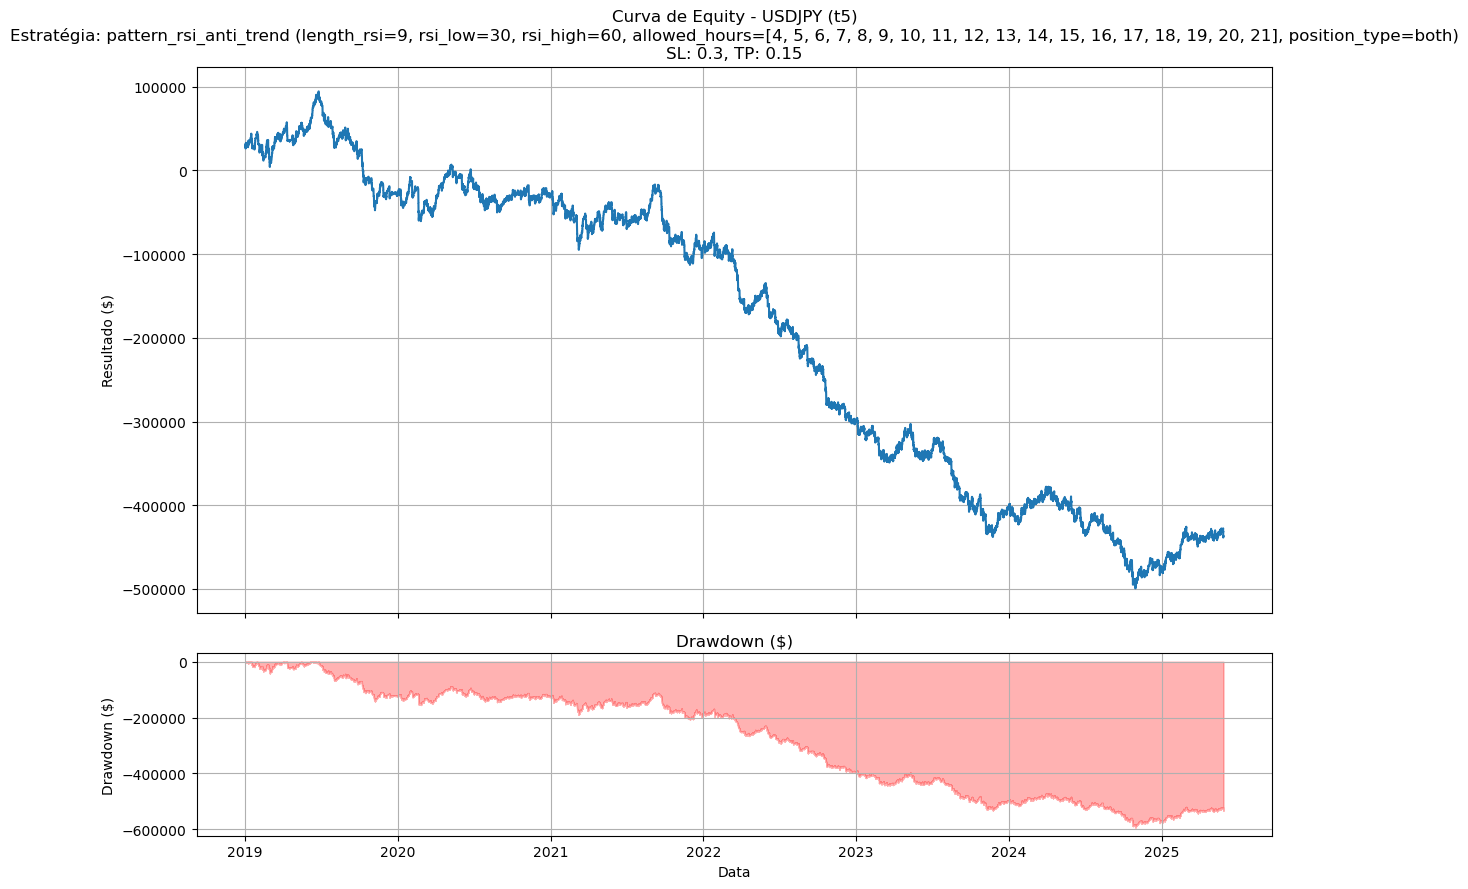

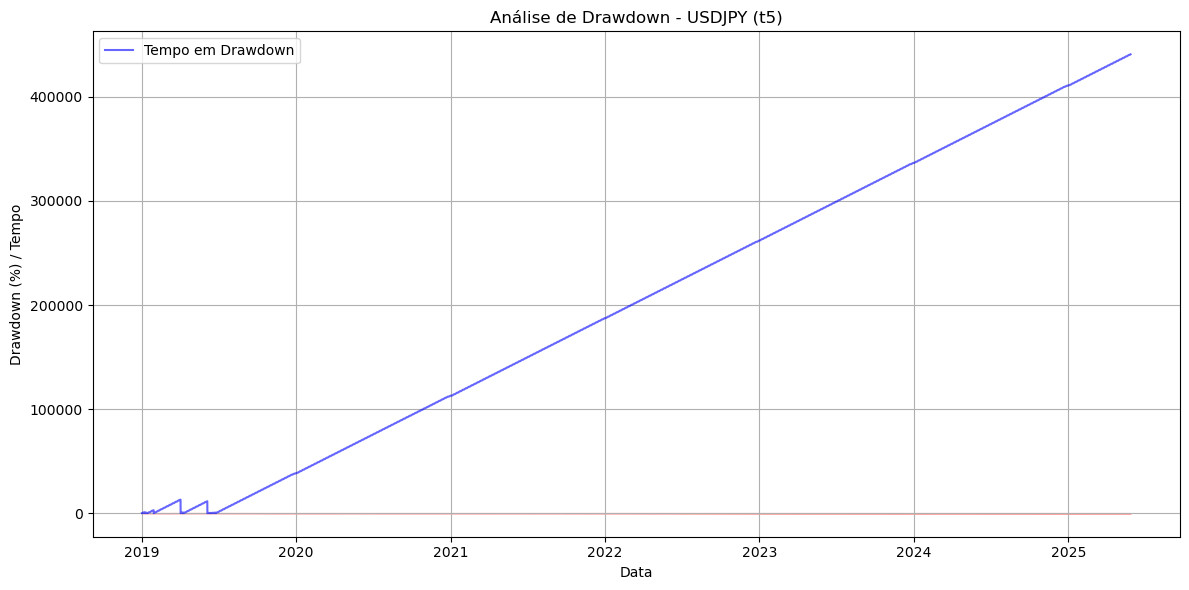

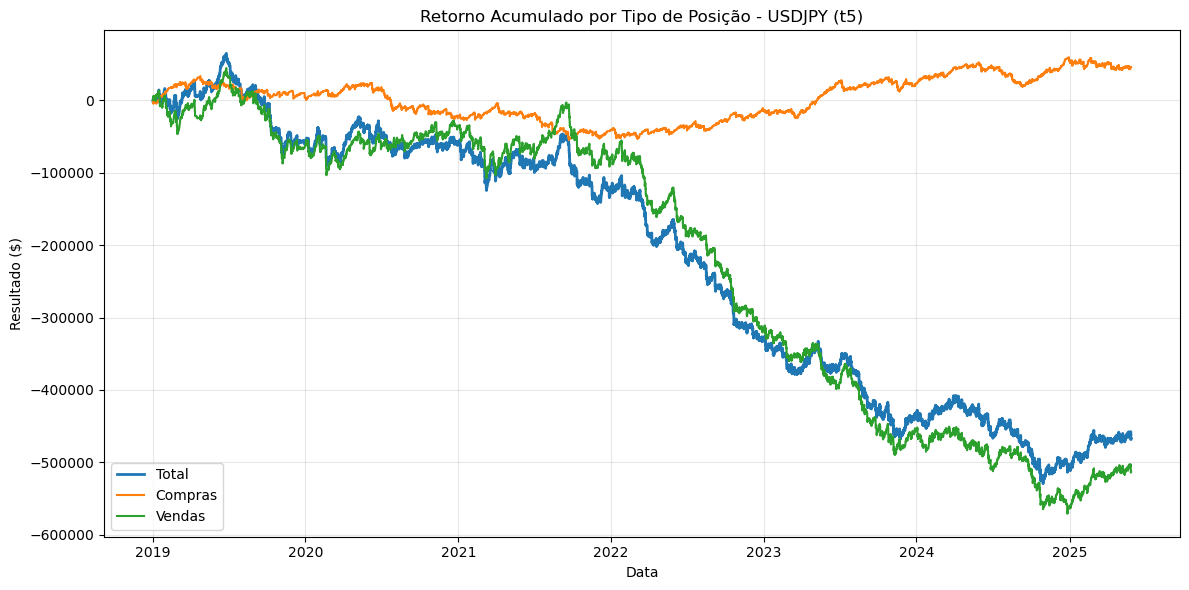

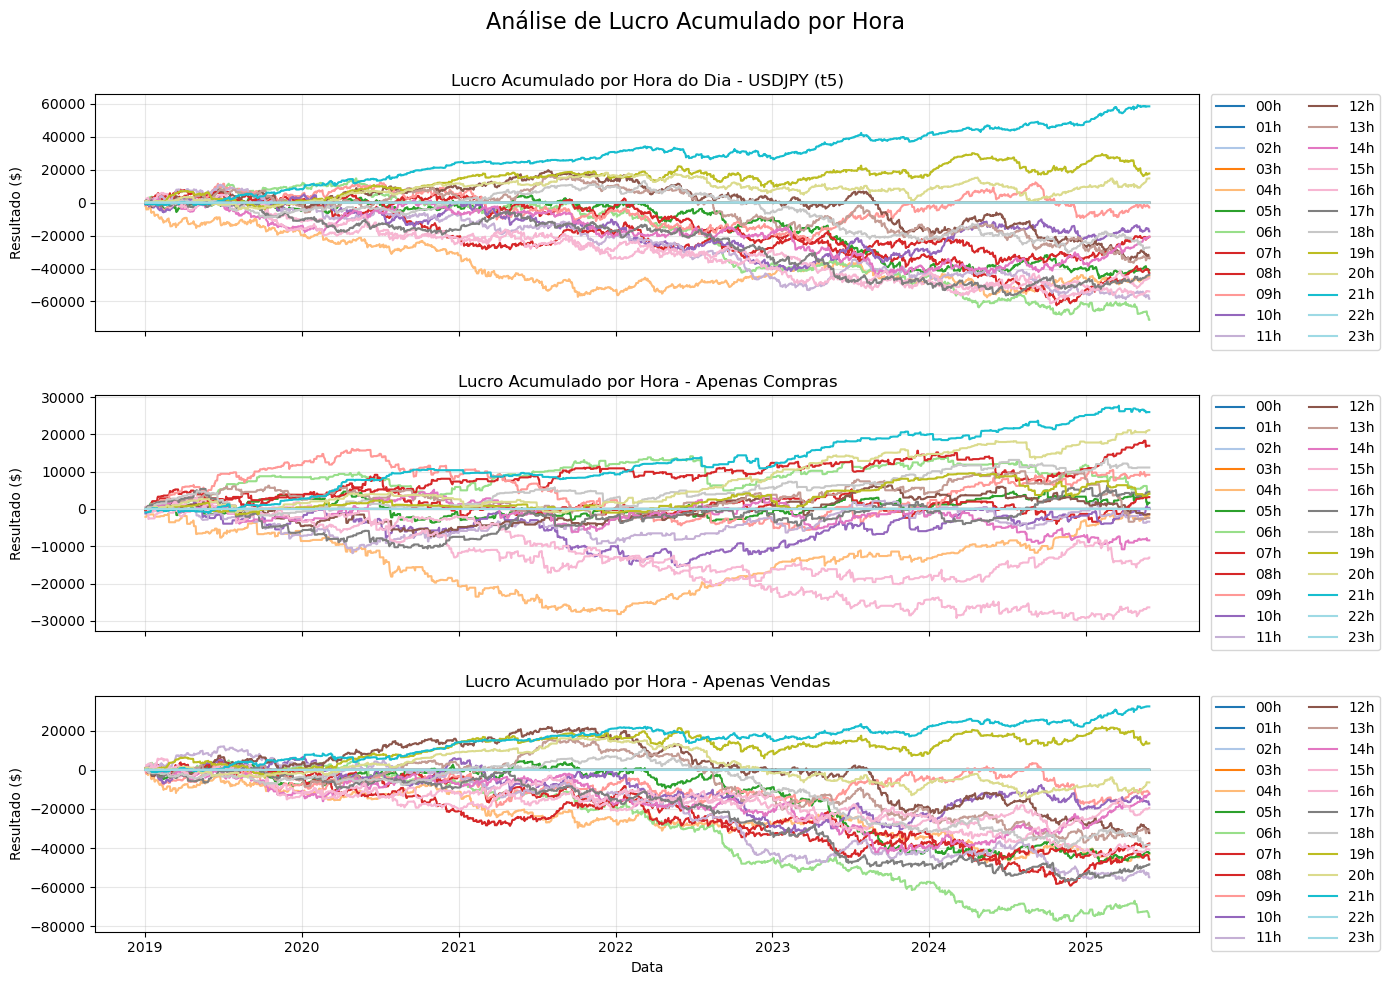

In [8]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

In [9]:
results

open     high      low    close  tick_volume  volume  \
time                                                                           
2019-01-02 00:00:00  109.663  109.666  109.649  109.649           17       0   
2019-01-02 00:05:00  109.649  109.654  109.648  109.648           10       0   
2019-01-02 00:10:00  109.648  109.652  109.617  109.620          302       0   
2019-01-02 00:15:00  109.618  109.672  109.612  109.617           71       0   
2019-01-02 00:20:00  109.617  109.647  109.605  109.643           55       0   
...                      ...      ...      ...      ...          ...     ...   
2025-05-28 00:50:00  144.254  144.273  144.252  144.273           11       0   
2025-05-28 00:55:00  144.273  144.274  144.253  144.253            9       0   
2025-05-28 01:00:00  144.253  144.294  144.248  144.252          102       0   
2025-05-28 01:05:00  144.252  144.253  144.170  144.199          128       0   
2025-05-28 01:10:00  144.199  144.206  144.172  144.179           64       0   

                    anomesdia       safra  position     idx  close_final  \
time                                                                       
2019-01-02 00:00:00  20190102  2019-01-02         0       0      108.878   
2019-01-02 00:05:00  20190102  2019-01-02         0       1      108.878   
2019-01-02 00:10:00  20190102  2019-01-02         0       2      108.878   
2019-01-02 00:15:00  20190102  2019-01-02         0       3      108.878   
2019-01-02 00:20:00  20190102  2019-01-02         0       4      108.878   
...                       ...         ...       ...     ...          ...   
2025-05-28 00:50:00  20250528  2025-05-28         0  476982      144.179   
2025-05-28 00:55:00  20250528  2025-05-28         0  476983      144.179   
2025-05-28 01:00:00  20250528  2025-05-28         0  476984      144.179   
2025-05-28 01:05:00  20250528  2025-05-28         0  476985      144.179   
2025-05-28 01:10:00  20250528  2025-05-28         0  476986      144.179   

                     idx_final  status_trade  sl_idx  tp_idx  pts_final  \
time                                                                      
2019-01-02 00:00:00        287           0.0       0       0        0.0   
2019-01-02 00:05:00        287           0.0       0       0        0.0   
2019-01-02 00:10:00        287           0.0       0       0        0.0   
2019-01-02 00:15:00        287           0.0       0       0        0.0   
2019-01-02 00:20:00        287           0.0       0       0        0.0   
...                        ...           ...     ...     ...        ...   
2025-05-28 00:50:00     476986           0.0       0       0        0.0   
2025-05-28 00:55:00     476986           0.0       0       0        0.0   
2025-05-28 01:00:00     476986           0.0       0       0        0.0   
2025-05-28 01:05:00     476986           0.0       0       0        0.0   
2025-05-28 01:10:00     476986           0.0       0       0        0.0   

                     strategy  cstrategy    equity  daily_returns_pct  \
time                                                                    
2019-01-02 00:00:00       0.0        0.0   30000.0                0.0   
2019-01-02 00:05:00       0.0        0.0   30000.0                0.0   
2019-01-02 00:10:00       0.0        0.0   30000.0                0.0   
2019-01-02 00:15:00       0.0        0.0   30000.0                0.0   
2019-01-02 00:20:00       0.0        0.0   30000.0                0.0   
...                       ...        ...       ...                ...   
2025-05-28 00:50:00       0.0  -466827.5 -436827.5               -0.0   
2025-05-28 00:55:00       0.0  -466827.5 -436827.5               -0.0   
2025-05-28 01:00:00       0.0  -466827.5 -436827.5               -0.0   
2025-05-28 01:05:00       0.0  -466827.5 -436827.5               -0.0   
2025-05-28 01:10:00       0.0  -466827.5 -436827.5               -0.0   

                       cummax   drawdown  drawdown_pct  underwater  

In [10]:
results.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'volume', 'anomesdia',
       'safra', 'position', 'idx', 'close_final', 'idx_final', 'status_trade',
       'sl_idx', 'tp_idx', 'pts_final', 'strategy', 'cstrategy', 'equity',
       'daily_returns_pct', 'cummax', 'drawdown', 'drawdown_pct', 'underwater',
       'time_uw'],
      dtype='object')

In [26]:
# Calcular retornos diários
equity_returns = results['equity'].pct_change().fillna(0)

# Agregar retornos por dia (composição correta para múltiplas operações no mesmo dia)
daily_returns = equity_returns.resample('D').apply(
    lambda x: (1 + x).prod() - 1 if len(x) > 0 else 0
)

# Filtrar apenas dias com dados reais
daily_returns_filtered = daily_returns[daily_returns != 0]

# Calcular métricas anualizadas
trading_days = len(daily_returns_filtered)
years = trading_days / 252  # 252 dias úteis por ano

In [29]:
initial_cash = 30000

# Retorno anualizado
final_equity = results['equity'].iloc[-1]
total_return_decimal = (final_equity / initial_cash) - 1
annual_return = (1 + total_return_decimal) ** (1/years) - 1

C:\Users\User\AppData\Local\Temp\ipykernel_19732\1088856275.py:6: RuntimeWarning: invalid value encountered in double_scalars
  annual_return = (1 + total_return_decimal) ** (1/years) - 1


In [30]:
total_return_decimal

-15.560916666661727

# Otimização

In [9]:
metrics

{'initial_cash': 30000,
 'final_equity': 148663.0,
 'total_return': 118663.0,
 'total_return_pct': 395.54333333333335,
 'annual_return': 31.44768159985931,
 'annual_volatility': 19.604626512650096,
 'total_trades': 4524,
 'win_trades': 1342,
 'loss_trades': 3181,
 'win_rate': 0.29664014146772766,
 'tp_rate': 0.1275419982316534,
 'sl_rate': 0.6821396993810787,
 'time_exit_rate': 0.1903183023872679,
 'profit_factor': 1.3223793417281335,
 'max_drawdown': 0.5930061091215505,
 'max_drawdown_value': 8000.0,
 'max_time_underwater': 14470.0,
 'underwater_rate': 0.9632069316790093,
 'sharpe_ratio': 1.6040949099217656,
 'sortino_ratio': 6.519152395982275,
 'calmar_ratio': 0.5303095721297767,
 'avg_win': 362.70342771982115,
 'avg_loss': 115.71361207167557,
 'win_loss_ratio': 3.13449231448375,
 'expectancy': 26.204086292645513,
 'risk_free_rate': 0.0}

In [51]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WIN@N'
    
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2019-01-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_int('sl', 100, 2800),
        tp = trial.suggest_int('tp', 100, 2800),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = False
    )
    
    # Parâmetros da estratégia RSI
    LENGTH_RSI = trial.suggest_int('LENGTH_RSI', 4, 10)
    RSI_LOW = trial.suggest_int('RSI_LOW', 20, 50)
    RSI_HIGH = trial.suggest_int('RSI_HIGH', 50, 80)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "length_rsi": LENGTH_RSI,
            "rsi_low": RSI_LOW,
            "rsi_high": RSI_HIGH,
            'allowed_hours': [10,11]
        }
    )

    
    metrica = metrics['sortino_ratio']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [52]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=220)

[I 2025-04-30 07:56:06,297] A new study created in memory with name: no-name-58d5a1f6-15ca-4368-a13a-c1a46c332400
[I 2025-04-30 07:56:07,041] Trial 0 finished with value: 0.944605573666232 and parameters: {'sl': 1862, 'tp': 1909, 'LENGTH_RSI': 9, 'RSI_LOW': 20, 'RSI_HIGH': 68}. Best is trial 0 with value: 0.944605573666232.
[I 2025-04-30 07:56:07,677] Trial 1 finished with value: 0.7279821427527057 and parameters: {'sl': 2666, 'tp': 1733, 'LENGTH_RSI': 8, 'RSI_LOW': 35, 'RSI_HIGH': 69}. Best is trial 0 with value: 0.944605573666232.
[I 2025-04-30 07:56:08,326] Trial 2 finished with value: 0.8282144613681334 and parameters: {'sl': 2723, 'tp': 2249, 'LENGTH_RSI': 6, 'RSI_LOW': 30, 'RSI_HIGH': 58}. Best is trial 0 with value: 0.944605573666232.
[I 2025-04-30 07:56:08,950] Trial 3 finished with value: 0.35636545406075054 and parameters: {'sl': 577, 'tp': 603, 'LENGTH_RSI': 7, 'RSI_LOW': 21, 'RSI_HIGH': 50}. Best is trial 0 with value: 0.944605573666232.
[I 2025-04-30 07:56:09,578] Trial 4 

[I 2025-04-30 07:56:29,894] Trial 36 finished with value: 0.8315089292709146 and parameters: {'sl': 604, 'tp': 2561, 'LENGTH_RSI': 7, 'RSI_LOW': 45, 'RSI_HIGH': 67}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:30,523] Trial 37 finished with value: 1.5158651912748025 and parameters: {'sl': 504, 'tp': 2130, 'LENGTH_RSI': 8, 'RSI_LOW': 42, 'RSI_HIGH': 61}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:31,142] Trial 38 finished with value: 1.178224672420023 and parameters: {'sl': 1086, 'tp': 2377, 'LENGTH_RSI': 10, 'RSI_LOW': 34, 'RSI_HIGH': 68}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:31,784] Trial 39 finished with value: 1.4414447063718596 and parameters: {'sl': 700, 'tp': 2606, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:32,422] Trial 40 finished with value: 0.28428679067743556 and parameters: {'sl': 1648, 'tp': 2009, 'LENGTH_RSI': 7, 'RS

[I 2025-04-30 07:56:52,680] Trial 72 finished with value: 10.049850349210553 and parameters: {'sl': 157, 'tp': 2667, 'LENGTH_RSI': 9, 'RSI_LOW': 39, 'RSI_HIGH': 62}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:53,310] Trial 73 finished with value: 5.7659405479011365 and parameters: {'sl': 271, 'tp': 2672, 'LENGTH_RSI': 9, 'RSI_LOW': 39, 'RSI_HIGH': 62}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:53,940] Trial 74 finished with value: 9.558008693644615 and parameters: {'sl': 170, 'tp': 2576, 'LENGTH_RSI': 9, 'RSI_LOW': 38, 'RSI_HIGH': 59}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:54,577] Trial 75 finished with value: 1.0856352715673532 and parameters: {'sl': 1209, 'tp': 2599, 'LENGTH_RSI': 10, 'RSI_LOW': 38, 'RSI_HIGH': 59}. Best is trial 31 with value: 11.174429436796345.
[I 2025-04-30 07:56:55,205] Trial 76 finished with value: 4.52171455712536 and parameters: {'sl': 295, 'tp': 2719, 'LENGTH_RSI': 9, 'RSI_LO

[I 2025-04-30 07:57:15,215] Trial 108 finished with value: 8.87375435757455 and parameters: {'sl': 293, 'tp': 2753, 'LENGTH_RSI': 10, 'RSI_LOW': 27, 'RSI_HIGH': 70}. Best is trial 107 with value: 14.444314371484571.
[I 2025-04-30 07:57:15,841] Trial 109 finished with value: 10.319379366848723 and parameters: {'sl': 236, 'tp': 2613, 'LENGTH_RSI': 10, 'RSI_LOW': 26, 'RSI_HIGH': 70}. Best is trial 107 with value: 14.444314371484571.
[I 2025-04-30 07:57:16,495] Trial 110 finished with value: 13.469426207803913 and parameters: {'sl': 153, 'tp': 2477, 'LENGTH_RSI': 10, 'RSI_LOW': 26, 'RSI_HIGH': 72}. Best is trial 107 with value: 14.444314371484571.
[I 2025-04-30 07:57:17,127] Trial 111 finished with value: 14.27155861782669 and parameters: {'sl': 102, 'tp': 2469, 'LENGTH_RSI': 10, 'RSI_LOW': 25, 'RSI_HIGH': 73}. Best is trial 107 with value: 14.444314371484571.
[I 2025-04-30 07:57:17,766] Trial 112 finished with value: 14.1877281378855 and parameters: {'sl': 136, 'tp': 2464, 'LENGTH_RSI': 1

[I 2025-04-30 07:57:37,507] Trial 144 finished with value: 12.535385956169748 and parameters: {'sl': 104, 'tp': 2027, 'LENGTH_RSI': 10, 'RSI_LOW': 24, 'RSI_HIGH': 76}. Best is trial 126 with value: 15.83441904574941.
[I 2025-04-30 07:57:38,120] Trial 145 finished with value: 11.485528823500239 and parameters: {'sl': 187, 'tp': 1879, 'LENGTH_RSI': 10, 'RSI_LOW': 21, 'RSI_HIGH': 73}. Best is trial 126 with value: 15.83441904574941.
[I 2025-04-30 07:57:38,741] Trial 146 finished with value: 15.530574675305713 and parameters: {'sl': 101, 'tp': 2131, 'LENGTH_RSI': 10, 'RSI_LOW': 20, 'RSI_HIGH': 77}. Best is trial 126 with value: 15.83441904574941.
[I 2025-04-30 07:57:39,357] Trial 147 finished with value: 9.692877305992566 and parameters: {'sl': 214, 'tp': 2140, 'LENGTH_RSI': 10, 'RSI_LOW': 24, 'RSI_HIGH': 77}. Best is trial 126 with value: 15.83441904574941.
[I 2025-04-30 07:57:39,970] Trial 148 finished with value: 2.179385767679275 and parameters: {'sl': 831, 'tp': 2231, 'LENGTH_RSI': 10

[I 2025-04-30 07:57:59,806] Trial 180 finished with value: 16.294780572208083 and parameters: {'sl': 210, 'tp': 1617, 'LENGTH_RSI': 10, 'RSI_LOW': 20, 'RSI_HIGH': 80}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:00,423] Trial 181 finished with value: 15.757369813702818 and parameters: {'sl': 214, 'tp': 1686, 'LENGTH_RSI': 10, 'RSI_LOW': 20, 'RSI_HIGH': 80}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:01,040] Trial 182 finished with value: 13.92812971966111 and parameters: {'sl': 208, 'tp': 1699, 'LENGTH_RSI': 10, 'RSI_LOW': 21, 'RSI_HIGH': 80}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:01,663] Trial 183 finished with value: 14.076400650472447 and parameters: {'sl': 255, 'tp': 1609, 'LENGTH_RSI': 10, 'RSI_LOW': 20, 'RSI_HIGH': 79}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:02,270] Trial 184 finished with value: 18.453306574656434 and parameters: {'sl': 168, 'tp': 1696, 'LENGTH_RSI

[I 2025-04-30 07:58:22,142] Trial 216 finished with value: 14.02865805669615 and parameters: {'sl': 162, 'tp': 1731, 'LENGTH_RSI': 10, 'RSI_LOW': 21, 'RSI_HIGH': 78}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:22,775] Trial 217 finished with value: 14.082069942562653 and parameters: {'sl': 148, 'tp': 1656, 'LENGTH_RSI': 10, 'RSI_LOW': 21, 'RSI_HIGH': 78}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:23,392] Trial 218 finished with value: 13.831861747538953 and parameters: {'sl': 212, 'tp': 1610, 'LENGTH_RSI': 10, 'RSI_LOW': 23, 'RSI_HIGH': 79}. Best is trial 166 with value: 18.453488597363915.
[I 2025-04-30 07:58:24,005] Trial 219 finished with value: 16.703833717009417 and parameters: {'sl': 146, 'tp': 1698, 'LENGTH_RSI': 10, 'RSI_LOW': 22, 'RSI_HIGH': 79}. Best is trial 166 with value: 18.453488597363915.


In [53]:
study.best_params

{'sl': 166, 'tp': 1648, 'LENGTH_RSI': 10, 'RSI_LOW': 20, 'RSI_HIGH': 80}

In [102]:
plot_param_importances(study)